In [1]:
import numpy as np
import scipy as sp
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


/home/me/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


x =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
y =  [-7 -4 -1  2  5  8 11 14 17 20 23 26 29 32 35 38 41 44 47 50]


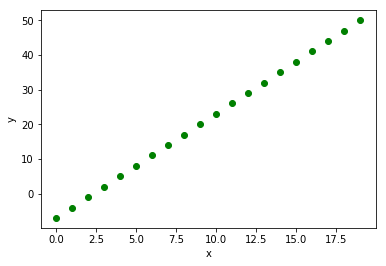

In [2]:
f1 = lambda x: 3 * x - 7
x = np.array(range(20))
y = np.array([f1(i) for i in range(20)])
print('x = ', x)
print('y = ', y)
plt.figure()
plt.plot(x,y,'og')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x_dat =  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4
  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19  0  1  2  3  4  5  6  7  8  9
 10 11 12 13 14 15 16 17 18 19]


y_dat =  [ -7.   -4.   -1.    2.    5.    8.   11.   14.   17.   20.   23.   26.
  29.   32.   35.   38.   41.   44.   47.   50.   -6.5  -3.5  -0.5   2.5
   5.5   8.5  11.5  14.5  17.5  20.5  23.5  26.5  29.5  32.5  35.5  38.5
  41.5  44.5  47.5  50.5  -7.5  -4.5  -1.5   1.5   4.5   7.5  10.5  13.5
  16.5  19.5  22.5  25.5  28.5  31.5  34.5  37.5  40.5  43.5  46.5  49.5]


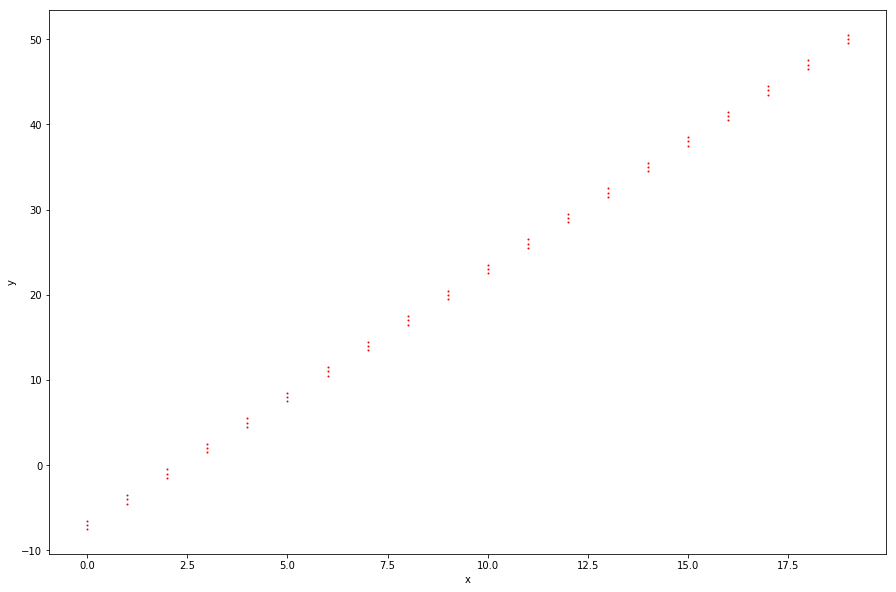

In [3]:
y_dat = np.r_[y,y+0.5,y-0.5]
x_dat = np.r_[x,x,x]

print('x_dat = ', x_dat,end = '\n\n\n')
print('y_dat = ', y_dat)

plt.figure(figsize=(15,10))
plt.plot(x_dat,y_dat,'ro',markersize = 1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
df = pd.DataFrame(data = {'x':x_dat,'y':y_dat})
df.head()

,x,y
0,0,-7.0
1,1,-4.0
2,2,-1.0
3,3,2.0
4,4,5.0


In [5]:
df.tail()

,x,y
55,15,37.5
56,16,40.5
57,17,43.5
58,18,46.5
59,19,49.5


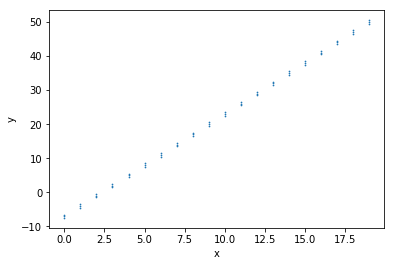

In [6]:
df.plot.scatter('x','y', s=0.5)
plt.show()

In [7]:
df.x.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
       14, 15, 16, 17, 18, 19,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       11, 12, 13, 14, 15, 16, 17, 18, 19])

In [8]:
LR = LinearRegression()
LR.fit(df.x.values.reshape(-1,1),df.y.values.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
LR.coef_

array([[ 3.]])

In [10]:
LR.intercept_

array([-7.])

In [11]:
LR.score(df.x.values.reshape(-1,1),df.y.values.reshape(-1,1))

0.99944336209295848

In [12]:
reg_result = sp.stats.linregress(x_dat,y_dat)
reg_result

LinregressResult(slope=3.0, intercept=-7.0, rvalue=0.99972164230497595, pvalue=4.3659790614820438e-96, stderr=0.009296394674098582)

In [13]:
r2_scipy = reg_result[2]**2
r2_scipy

0.99944336209295825

#### Note
sklearn.linear_model.LinearRegression give coefficient of determination (R^2)
<p>https://en.wikipedia.org/wiki/Coefficient_of_determination
<p>scipy.stats.linregress give correlation coefficient (r)
<p>https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

In [14]:
x_sk = df.x.values.reshape(-1,1)
y_sk = df.y.values.reshape(-1,1)
x_sp = df.x.values
y_sp = df.y.values
x_sm = sm.add_constant(x_sp)

In [15]:
model = sm.OLS(y_sp,x_sm)
results = model.fit()

In [16]:
results.params

array([-7.,  3.])

In [17]:
results.rsquared

0.99944336209295848

In [18]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.041e+05
Date:                Thu, 28 Sep 2017   Prob (F-statistic):           4.37e-96
Time:                        15:06:01   Log-Likelihood:                -31.384
No. Observations:                  60   AIC:                             66.77
Df Residuals:                      58   BIC:                             70.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0000      0.103    -67.756      0.000      -7.207      -6.793
x1             3.0000      0.009    322.706      0.000       2.981       3.019
==============================================================================
Omnibus:                       61.733   Durbin-Watson:                   0.125
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.625
Skew:                           0.000   Prob(JB):                       0.0601
Kurtosis:                       1.500   Cond. No.                         21.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
x_sm

array([[  1.,   0.],
       [  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       [  1.,   4.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,   7.],
       [  1.,   8.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,  11.],
       [  1.,  12.],
       [  1.,  13.],
       [  1.,  14.],
       [  1.,  15.],
       [  1.,  16.],
       [  1.,  17.],
       [  1.,  18.],
       [  1.,  19.],
       [  1.,   0.],
       [  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       [  1.,   4.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,   7.],
       [  1.,   8.],
       [  1.,   9.],
       [  1.,  10.],
       [  1.,  11.],
       [  1.,  12.],
       [  1.,  13.],
       [  1.,  14.],
       [  1.,  15.],
       [  1.,  16.],
       [  1.,  17.],
       [  1.,  18.],
       [  1.,  19.],
       [  1.,   0.],
       [  1.,   1.],
       [  1.,   2.],
       [  1.,   3.],
       [  1.,   4.],
       [  1.,   5.],
       [  1.,   6.],
       [  1.,

In [20]:
pfit_result = sp.polyfit(x_sp,y_sp, deg = 1)
pfit_result

array([ 3., -7.])

In [21]:
p = np.poly1d(pfit_result)

In [22]:
#calculate r2 by sklearn r2_score
r2_score(y_sk,p(x_sk))

0.99944336209295848

In [23]:
p(x_sp)

array([ -7.,  -4.,  -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.,  23.,
        26.,  29.,  32.,  35.,  38.,  41.,  44.,  47.,  50.,  -7.,  -4.,
        -1.,   2.,   5.,   8.,  11.,  14.,  17.,  20.,  23.,  26.,  29.,
        32.,  35.,  38.,  41.,  44.,  47.,  50.,  -7.,  -4.,  -1.,   2.,
         5.,   8.,  11.,  14.,  17.,  20.,  23.,  26.,  29.,  32.,  35.,
        38.,  41.,  44.,  47.,  50.])

In [24]:
# Manually calculating R^2
# direct calculation of R^2
y_bar = y_sp.sum()/y_sp.shape[0]
# total sum of squares
SS_tot = ((y_sp-y_bar)**2).sum()
# residual sum of squares
SS_res = ((y_sp-p(x_sp))**2).sum()
# coefficient of determination
R2 = 1 - SS_res/SS_tot
R2

0.99944336209295848

# Amount of time taken by each method

In [25]:
%timeit LR.fit(x_sk,y_sk)

1000 loops, best of 3: 228 µs per loop


In [26]:
%timeit sp.stats.linregress(x_sp,y_sp)

10000 loops, best of 3: 189 µs per loop


In [27]:
%%timeit -n 1000 
model = sm.OLS(y_sp,x_sm)
results = model.fit()

1000 loops, best of 3: 204 µs per loop


In [28]:
%%timeit -n 1000 
sp.polyfit(x_sp,y_sp, deg = 1)

1000 loops, best of 3: 94.8 µs per loop


In [29]:
# for small vector polyfit is fastest
'''https://stackoverflow.com/questions/31126698/differences-between-scipy-stats-linregress-numpy-polynomial-polynomial-polyfi'''

'https://stackoverflow.com/questions/31126698/differences-between-scipy-stats-linregress-numpy-polynomial-polynomial-polyfi'

In [30]:
%%timeit -n 1000 
model = sm.OLS(y_sp,x_sm)

1000 loops, best of 3: 61.1 µs per loop


In [31]:
%%timeit -n 1000 
results = model.fit()

1000 loops, best of 3: 8.38 µs per loop


# Do regression manually
$\big(\boldsymbol{X^TX}\big)\boldsymbol{\hat{\beta}} = \boldsymbol{X^Ty}$
<p>$\boldsymbol{\hat{\beta}} = \big(\boldsymbol{X^TX}\big)^{-1}\boldsymbol{X^Ty}$
or solving system of linear equation

In [32]:
# x for manual regression
x_mr = np.c_[np.ones(x_sk.shape),x_sk]

In [33]:
print('x_mr head & tail')
print(x_mr[:5,:])
print('...')
print(x_mr[-5:,:])

x_mr head & tail
[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]]
...
[[  1.  15.]
 [  1.  16.]
 [  1.  17.]
 [  1.  18.]
 [  1.  19.]]


In [34]:
XTX = x_mr.T.dot(x_mr)
XTX

array([[   60.,   570.],
       [  570.,  7410.]])

In [35]:
XTY = x_mr.T.dot(y_sk)
XTY

array([[  1290.],
       [ 18240.]])

In [36]:
# coefficient from manual regression
coeff_mr = sp.linalg.solve(XTX,XTY)
coeff_mr

array([[-7.],
       [ 3.]])

In [37]:
x_mr.T

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,
          1.,   1.,   1.,   1.,   1.],
       [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
         13.,  14.,  15.,  16.,  17.,  18.,  19.,   0.,   1.,   2.,   3.,
          4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
         15.,  16.,  17.,  18.,  19.]])

In [38]:
# notice that coeff_mr[0,0] is for x_mr.T[0]  or constant (intercept)
# coeff_mr[1,0] is for x_mr.T[1]   or x (slope)

In [39]:
coeff_mr[1,0]

2.9999999999999987

In [40]:
x_mr.T[1]

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,   0.,   1.,
         2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,
        13.,  14.,  15.,  16.,  17.,  18.,  19.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,  12.,  13.,  14.,
        15.,  16.,  17.,  18.,  19.])

# Polynomial Regression
## Generating Data for&nbsp;&nbsp;&nbsp; $y = 3x^3 - 7x^2 +16x - 19$

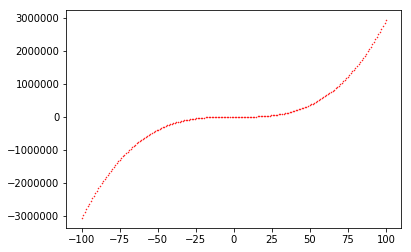

In [41]:
x = np.linspace(-100,100,200)
y = 3*x**3 - 7*x**2 + 16*x - 19
plt.figure()
plt.plot(x,y,'ro', markersize = '0.5')
plt.show()

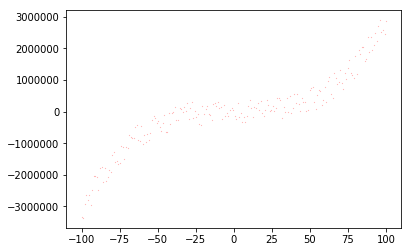

In [42]:
np.random.seed(11)
ran = np.random.uniform(-1,1,size = [200])
y_10 = np.array(y.tolist()*1)
y_noise = y_10 + 4.0e5 * ran
x_noise = np.array(x.tolist()*1)
plt.figure()
plt.plot(x_noise,y_noise,'ro', markersize = '0.1')
plt.show()

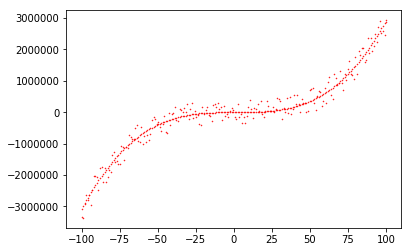

In [43]:
x_dat = np.r_[x,x_noise] 
y_dat = np.r_[y,y_noise]
plt.figure()
plt.plot(x_dat,y_dat,'ro', markersize = '0.5')
plt.show()

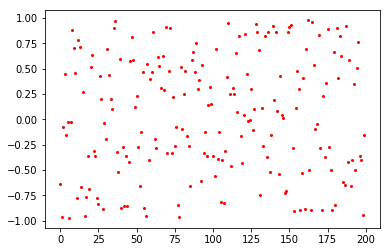

In [44]:
plt.plot(ran, 'ro', markersize = 2)
plt.show()

In [45]:
ran.shape

(200,)

In [46]:
x_dat.shape

(400,)

In [47]:
y_dat.shape

(400,)

In [48]:
p_exact = sp.polyfit(x,y,deg = 3)
p_exact

array([  3.,  -7.,  16., -19.])

### Original equation
y = 3*x**3 - 7*x**2 + 16*x - 19

## Use scipy/numpy polyfit
numpy.polyfit and scipy.polyfit are the same object
https://stackoverflow.com/questions/38269897/what-is-the-difference-between-numpy-polyfit-and-scipy-polyfit

In [49]:
sp.polyfit is np.polyfit

True

In [50]:
p_noi = sp.polyfit(x_dat,y_dat,deg = 3)
p_noi

array([  2.98137019e+00,  -1.16192611e+01,   2.42264273e+02,
         2.24850135e+04])

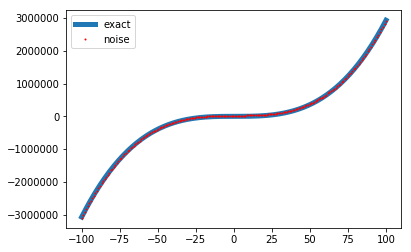

In [51]:
p_fn_ex = np.poly1d(p_exact)
p_fn_ni = np.poly1d(p_noi)

y_pre_ex = p_fn_ex(x)
y_pre_ni = p_fn_ni(x)

plt.figure()
plt.plot(x,y_pre_ex, label = 'exact', linewidth = 5)
plt.plot(x,y_pre_ni, 'or', label = 'noise', markersize = 1)
plt.legend()
plt.show()

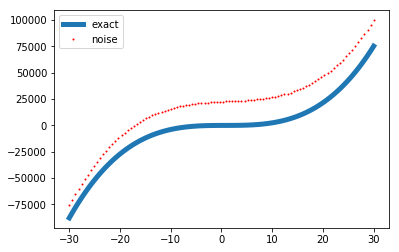

In [52]:
x_test = np.linspace(-30,30,100)
y_l_ex = p_fn_ex(x_test)
y_l_ni = p_fn_ni(x_test)
plt.figure()
plt.plot(x_test,y_l_ex, label = 'exact', linewidth = 5)
plt.plot(x_test,y_l_ni, 'or', label = 'noise', markersize = 1)
plt.legend()
plt.show()

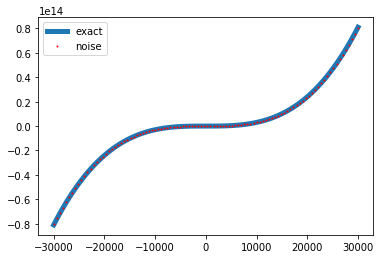

In [53]:
x_test = np.linspace(-30000,30000,100)
y_l_ex = p_fn_ex(x_test)
y_l_ni = p_fn_ni(x_test)
plt.figure()
plt.plot(x_test,y_l_ex, label = 'exact', linewidth = 5)
plt.plot(x_test,y_l_ni, 'or', label = 'noise', markersize = 1)
plt.legend()
plt.show()

## Polynomai Regression with scikit learn

In [54]:
LR = LinearRegression()

In [55]:
x.shape

(200,)

In [56]:
x.reshape(-1,1).shape

(200, 1)

In [57]:
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x.reshape(-1,1))
np.set_printoptions(precision = 3, suppress=True)
x_poly

array([[       1.   ,     -100.   ,    10000.   , -1000000.   ],
       [       1.   ,      -98.995,     9800.005,  -970151.254],
       [       1.   ,      -97.99 ,     9602.03 ,  -940902.462],
       [       1.   ,      -96.985,     9406.076,  -912247.533],
       [       1.   ,      -95.98 ,     9212.141,  -884180.378],
       [       1.   ,      -94.975,     9020.227,  -856694.904],
       [       1.   ,      -93.97 ,     8830.333,  -829785.02 ],
       [       1.   ,      -92.965,     8642.459,  -803444.637],
       [       1.   ,      -91.96 ,     8456.605,  -777667.662],
       [       1.   ,      -90.955,     8272.771,  -752448.006],
       [       1.   ,      -89.95 ,     8090.957,  -727779.576],
       [       1.   ,      -88.945,     7911.164,  -703656.283],
       [       1.   ,      -87.94 ,     7733.391,  -680072.035],
       [       1.   ,      -86.935,     7557.637,  -657020.742],
       [       1.   ,      -85.93 ,     7383.904,  -634496.312],
       [       1.   ,    

In [58]:
LR.fit(x_poly,y)
LR.coef_

array([  0.,  16.,  -7.,   3.])

In [59]:
# note that if fit_intercept=False, then the intercept will be added into part of coef_
# when we have a column of 1,1,1,1,1,...

In [60]:
x_poly[0,:]

array([       1.,     -100.,    10000., -1000000.])

In [61]:
#original equation
#y = 3*x**3 - 7*x**2 + 16*x - 19

In [62]:
LR.intercept_

-18.9999999997126

# Polynomai Regression with scipy.optimize.curve_fit
## This time the non-linear least-square is used
### Input: callable function with the independent variable as the first input
### &nbsp;&nbsp;&nbsp;&nbsp;unknown constants follows the independent variable
### Return: optimal values for unknowns, covariance matrix of optimal unknowns

In [63]:
sp_poly = sp.optimize.curve_fit(
    lambda x,c1,c2,c3,c4: c1*x**3 + c2*x**2 + c3*x + c4,x,y)

In [64]:
sp_poly

(array([  3.,  -7.,  16., -19.]), array([[ 0., -0., -0.,  0.],
        [-0.,  0.,  0., -0.],
        [-0.,  0.,  0., -0.],
        [ 0., -0., -0.,  0.]]))

In [65]:
x_poly.shape

(200, 4)

# Polynomai Regression with sm.OLS
Ordinary Least Square

In [66]:
model_poly = sm.OLS(y,x_poly)
results_poly = model_poly.fit()

In [67]:
results_poly.params

array([-19.,  16.,  -7.,   3.])

In [68]:
results_poly.rsquared

1.0

In [69]:
results_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.173e+32
Date:                Thu, 28 Sep 2017   Prob (F-statistic):               0.00
Time:                        15:06:12   Log-Likelihood:                 3891.1
No. Observations:                 200   AIC:                            -7774.
Df Residuals:                     196   BIC:                            -7761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.0000   9.21e-11  -2.06e+11      0.000     -19.000     -19.000
x1            16.0000   2.65e-12   6.05e+12      0.000      16.000      16.000
x2            -7.0000   2.04e-14  -3.43e+14      0.000      -7.000      -7.000
x3             3.0000      4e-16    7.5e+15      0.000       3.000       3.000
==============================================================================
Omnibus:                      657.475   Durbin-Watson:                   0.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.326
Skew:                           0.106   Prob(JB):                     0.000173
Kurtosis:                       1.574   Cond. No.                     5.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.75e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Manual polynomial regression with scipy linear algbra package sp.linalg

$\big(\boldsymbol{X^TX}\big)\boldsymbol{\hat{\beta}} = \boldsymbol{X^Ty}$
<p>$\boldsymbol{\hat{\beta}} = \big(\boldsymbol{X^TX}\big)^{-1}\boldsymbol{X^Ty}$

In [70]:
x = np.linspace(-100,100,200)
y = 3*x**3 - 7*x**2 + 16*x - 19
poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(x.reshape(-1,1))
XTX = x_poly.T.dot(x_poly)
XTy = x_poly.T.dot(y.reshape(-1,1))
Beta = sp.linalg.solve(XTX,XTy)
Beta

array([[-19.],
       [ 16.],
       [ -7.],
       [  3.]])

In [71]:
x_poly[0:5,:]

array([[       1.   ,     -100.   ,    10000.   , -1000000.   ],
       [       1.   ,      -98.995,     9800.005,  -970151.254],
       [       1.   ,      -97.99 ,     9602.03 ,  -940902.462],
       [       1.   ,      -96.985,     9406.076,  -912247.533],
       [       1.   ,      -95.98 ,     9212.141,  -884180.378]])

In [72]:
x_poly[0:5,:].T

array([[       1.   ,        1.   ,        1.   ,        1.   ,        1.   ],
       [    -100.   ,      -98.995,      -97.99 ,      -96.985,      -95.98 ],
       [   10000.   ,     9800.005,     9602.03 ,     9406.076,
            9212.141],
       [-1000000.   ,  -970151.254,  -940902.462,  -912247.533,
         -884180.378]])

# Over-fitting

## Use all data to train polynomial model

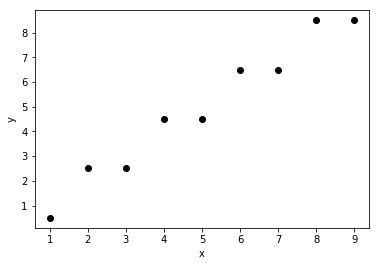

In [73]:
x_train = np.arange(1,10)
y_train = x_train + 0.5 * (-1)**x_train
plt.plot(x_train, y_train, 'ok')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

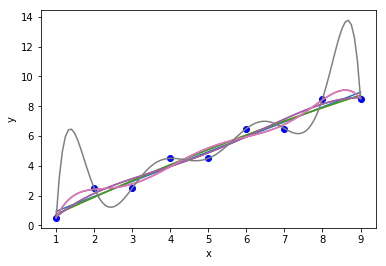

r-squared values
poly deg  1  r2 =  0.964285714286
poly deg  2  r2 =  0.966604823748
poly deg  3  r2 =  0.966604823748
poly deg  4  r2 =  0.971228771229
poly deg  5  r2 =  0.971228771229
poly deg  6  r2 =  0.97954045954
poly deg  7  r2 =  0.97954045954
poly deg  8  r2 =  1.0

coefficient values
1   -0.056    1.000 
2   -0.452    1.216   -0.022 
3   -0.452    1.216   -0.022   -0.000 
4   -2.167    3.564   -0.956    0.140   -0.007 
5   -2.167    3.564   -0.956    0.140   -0.007   -0.000 
6  -13.722   27.508  -18.434    6.120   -1.047    0.089   -0.003 
7  -13.722   27.508  -18.434    6.120   -1.047    0.089   -0.003    0.000 
8 -255.500  657.762 -660.597  347.556 -106.267   19.556   -2.133    0.127   -0.003 

coefficient values in scientific format
1 -5.6E-02  1.0E+00 
2 -4.5E-01  1.2E+00 -2.2E-02 
3 -4.5E-01  1.2E+00 -2.2E-02 -4.4E-16 
4 -2.2E+00  3.6E+00 -9.6E-01  1.4E-01 -7.0E-03 
5 -2.2E+00  3.6E+00 -9.6E-01  1.4E-01 -7.0E-03 -6.7E-15 
6 -1.4E+01  2.8E+01 -1.8E+01  6.1E+00 -1.0E+00  

In [74]:
plt.figure()
plt.plot(x_train,y_train,'ob')
r2_list = []
coeff_list = []
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    model.fit(x_poly,y_train)
    x_pred = np.linspace(1,9,100)
    x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
    y_pred = model.predict(x_pred_poly)
    x_poly_rcal = poly.fit_transform(x_train.reshape(-1,1))
    y_pred_rcal = model.predict(x_poly_rcal)
    r2_list.append(r2_score(y_train, y_pred_rcal))
    coeff = model.coef_
    coeff[0] = model.intercept_
    coeff_list.append(coeff)
    plt.plot(x_pred,y_pred)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
print('r-squared values')
for i,r in enumerate(r2_list):
    print('poly deg ',i+1,' r2 = ', r)
print('')
print('coefficient values')
for i, coe in enumerate(coeff_list):
    print(i+1, end = ' ')
    for val in coe:
        print('{:8.3f}'.format(val), end = ' ')
    print('')
print('')
print('coefficient values in scientific format')
for i, coe in enumerate(coeff_list):
    print(i+1, end = ' ')
    for val in coe:
        print('{:8.1E}'.format(val), end = ' ')
    print('')

# Test the model with the test dataset

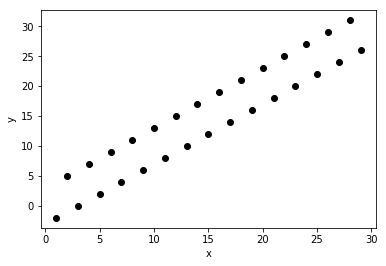

In [75]:
x = np.arange(1,30)
y = x + 3 * (-1)**x
plt.plot(x, y, 'ok')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [76]:

x_train, x_test, y_train, y_test = (
    train_test_split(x , y, test_size = 0.2, random_state = 2))

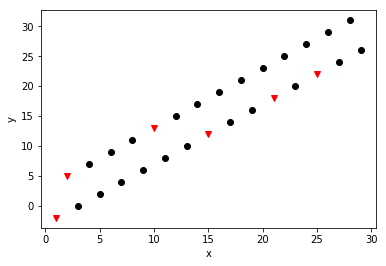

In [77]:
plt.plot(x_train, y_train, 'ok')
plt.plot(x_test, y_test, 'vr')
plt.ylabel('y')
plt.xlabel('x')
plt.show()

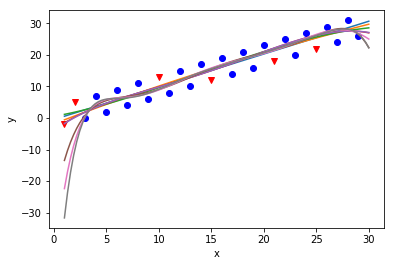

r-squared values
poly deg  1  r2 =  0.887422696249
poly deg  2  r2 =  0.889474450878
poly deg  3  r2 =  0.891294760288
poly deg  4  r2 =  0.89313046925
poly deg  5  r2 =  0.89313543771
poly deg  6  r2 =  0.898036380457
poly deg  7  r2 =  0.899006392293
poly deg  8  r2 =  0.89937952502

r-squared on test dataset
poly deg  1  r2 =  0.851697663569
poly deg  2  r2 =  0.818668568091
poly deg  3  r2 =  0.782105466559
poly deg  4  r2 =  0.66026983107
poly deg  5  r2 =  0.609890240696
poly deg  6  r2 =  -13.9017376131
poly deg  7  r2 =  -43.8264253439
poly deg  8  r2 =  -99.5461513265

coefficient values
1   -0.478    1.039 
2   -1.830    1.267   -0.007 
3    0.515    0.597    0.042   -0.001 
4   -3.696    2.295   -0.165    0.009   -0.000 
5   -4.091    2.502   -0.202    0.011   -0.000    0.000 
6  -27.780   17.622   -3.656    0.382   -0.020    0.001   -0.000 
7  -48.228   32.841   -7.917    0.975   -0.065    0.002   -0.000    0.000 
8  -72.584   53.918  -15.066    2.229   -0.192    0.010   -0

In [78]:
plt.figure()
plt.plot(x_train,y_train,'ob')
plt.plot(x_test,y_test,'vr')
r2_list = []
coeff_list = []
r2_test = []
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    model.fit(x_poly,y_train)
    x_pred = np.linspace(1,30,100)
    x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
    y_pred = model.predict(x_pred_poly)
    x_poly_rcal = poly.fit_transform(x_train.reshape(-1,1))
    y_pred_rcal = model.predict(x_poly_rcal)
    r2_list.append(r2_score(y_train, y_pred_rcal))
    coeff = model.coef_
    coeff[0] = model.intercept_
    coeff_list.append(coeff)
    #r2 test score

    x_poly_rt = poly.fit_transform(x_test.reshape(-1,1))
    y_pred_rt = model.predict(x_poly_rt)
    r2_test.append(r2_score(y_test, y_pred_rt))
    
    plt.plot(x_pred,y_pred)
plt.ylabel('y')
plt.xlabel('x')
plt.show()
print('r-squared values')
for i,r in enumerate(r2_list):
    print('poly deg ',i+1,' r2 = ', r)
print('\nr-squared on test dataset')
for i,r in enumerate(r2_test):
    print('poly deg ',i+1,' r2 = ', r)
print('')
print('coefficient values')
for i, coe in enumerate(coeff_list):
    print(i+1, end = ' ')
    for val in coe:
        print('{:8.3f}'.format(val), end = ' ')
    print('')
print('')
print('coefficient values in scientific format')
for i, coe in enumerate(coeff_list):
    print(i+1, end = ' ')
    for val in coe:
        print('{:8.1E}'.format(val), end = ' ')
    print('')


For this test set, the linear model is best.
Higher order or more complex model can be too sensitive to the noise
The data come with noise, it should be trusted, but not too much.

# Cross-validation score
Keep test dataset away first. do it within the training dataset
<p>Use test dataset at the very last

In [79]:
np.random.seed(41)
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    score = cross_val_score(model, x_poly, y_train, cv = 5)
    print(score, score.mean())
    

[ 0.913  0.776  0.903  0.56   0.804] 0.791294014372
[ 0.863  0.773  0.905  0.53   0.769] 0.767837298894
[ 0.865  0.779  0.894  0.261  0.76 ] 0.711904255113
[ 0.859  0.78   0.838  0.138  0.777] 0.678502982241
[ 0.857  0.638  0.72  -0.021  0.68 ] 0.574852667831
[ 0.87   0.596  0.773  0.082  0.468] 0.55774095335
[ 0.872  0.571  0.829  0.082  0.15 ] 0.500972850349
[ 0.469  0.442  0.866  0.099  0.409] 0.456874139338


In [80]:
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    CV = KFold(n_splits=5, shuffle=False)
    score = cross_val_score(model, x_poly, y_train, cv = CV)
    print(score, score.mean())

[ 0.913  0.776  0.903  0.56   0.804] 0.791294014372
[ 0.863  0.773  0.905  0.53   0.769] 0.767837298894
[ 0.865  0.779  0.894  0.261  0.76 ] 0.711904255113
[ 0.859  0.78   0.838  0.138  0.777] 0.678502982241
[ 0.857  0.638  0.72  -0.021  0.68 ] 0.574852667831
[ 0.87   0.596  0.773  0.082  0.468] 0.55774095335
[ 0.872  0.571  0.829  0.082  0.15 ] 0.500972850349
[ 0.469  0.442  0.866  0.099  0.409] 0.456874139338


### Notice that cross_val_score(cv = 5) is equivalent to using KFold without shuffle

In [81]:
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    CV = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(model, x_poly, y_train, cv = CV)
    print(score, score.mean())

[ 0.799  0.84   0.551  0.785  0.835] 0.761919634185
[ 0.765  0.836  0.573  0.788  0.843] 0.760930439865
[ 0.767  0.837  0.525  0.789  0.812] 0.74595298807
[ 0.759  0.831  0.286  0.747  0.726] 0.669933838864
[ 0.758  0.613  0.285  0.712  0.566] 0.586689804061
[ 0.737 -0.458  0.283  0.695  0.712] 0.393608387931
[ 0.72  -5.042 -0.123  0.69  -0.731] -0.897226879374
[  0.716 -30.177  -0.498   0.609  -2.069] -6.28359960222


In [82]:
for deg in range(1,9):
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(x_train.reshape(-1,1))
    model = LinearRegression()
    CV = KFold(n_splits=5, shuffle=True, random_state=24)
    score = cross_val_score(model, x_poly, y_train, cv = CV)
    print(score, score.mean())

[ 0.831  0.865  0.826  0.915  0.649] 0.81738134372
[ 0.833  0.867  0.824  0.92   0.59 ] 0.806644010074
[ 0.834  0.775  0.818  0.924  0.607] 0.791904760033
[ 0.839  0.789  0.827  0.843  0.607] 0.781271071017
[ 0.803  0.709  0.821  0.825  0.604] 0.752619730732
[ 0.702  0.714  0.802 -0.992  0.59 ] 0.363007074611
[ 0.705  0.823  0.802 -2.579  0.555] 0.0612519134468
[ 0.709  0.729  0.712 -3.546  0.137] -0.251757841161


In [83]:
# Try to shuffle in a couple of ways for cross validation
# to see if if the performance is still good or not

In [84]:
CV = KFold(n_splits=5, shuffle=True, random_state=24)

In [85]:
CV

KFold(n_splits=5, random_state=24, shuffle=True)

In [86]:
a = np.arange(1,11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [87]:
CV.split(a)

<generator object _BaseKFold.split at 0x7f3170fd42b0>

In [88]:
list(CV.split(a))

[(array([0, 1, 2, 3, 5, 6, 7, 8]), array([4, 9])),
 (array([0, 1, 2, 3, 4, 5, 6, 9]), array([7, 8])),
 (array([0, 1, 2, 3, 4, 7, 8, 9]), array([5, 6])),
 (array([2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7, 8, 9]), array([2, 3]))]

In [89]:
CV = KFold(n_splits=5, shuffle=True, random_state=13)
list(CV.split(a))

[(array([0, 1, 2, 4, 6, 7, 8, 9]), array([3, 5])),
 (array([0, 2, 3, 4, 5, 7, 8, 9]), array([1, 6])),
 (array([0, 1, 2, 3, 5, 6, 8, 9]), array([4, 7])),
 (array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9])),
 (array([1, 3, 4, 5, 6, 7, 8, 9]), array([0, 2]))]

In [90]:
CV = KFold(n_splits=5, shuffle=False)
list(CV.split(a))

[(array([2, 3, 4, 5, 6, 7, 8, 9]), array([0, 1])),
 (array([0, 1, 4, 5, 6, 7, 8, 9]), array([2, 3])),
 (array([0, 1, 2, 3, 6, 7, 8, 9]), array([4, 5])),
 (array([0, 1, 2, 3, 4, 5, 8, 9]), array([6, 7])),
 (array([0, 1, 2, 3, 4, 5, 6, 7]), array([8, 9]))]

In [91]:
# sometimes, randomly selected the validation set 
# may not preserve the proportion that need to be preserved
# for example, the height samples are from 50% male and 50% female
# if randomly selected the validation set, sometimes 100% may be male
# For the case like this use, stratified k-fold
# (see sklearn documentation, not covered)
# to preserve the proportion of groups after sampling for k-fold

# L1 Regularization (LASSO)

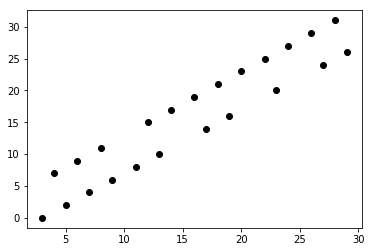

In [92]:
plt.plot(x_train,y_train,'ok')
plt.show()

In [93]:
x_train

array([17,  7,  4, 20, 28, 27, 13,  5, 11,  6, 22, 18,  3,  8, 26, 24, 19,
       12, 23, 29, 14, 16,  9])

In [94]:
poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x_train.reshape(-1,1))
x_poly.shape

(23, 9)

In [95]:
model = Lasso()
model.fit(x_poly,y_train.reshape(-1,1))

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [96]:
model.coef_

array([ 0.   ,  0.   ,  0.078, -0.001, -0.   ,  0.   ,  0.   ,  0.   , -0.   ])

In [97]:
model.intercept_

array([ 2.987])

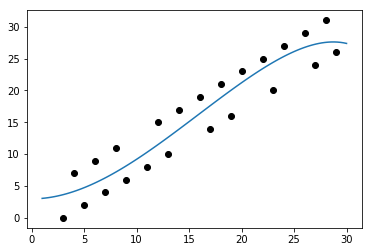

In [98]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.show()

In [99]:
CV = KFold(n_splits=5, shuffle=True, random_state=24)
score = cross_val_score(model, x_poly, y_train, cv = CV)
score, score.mean()

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You migh

(array([ 0.833,  0.798,  0.812,  0.883,  0.65 ]), 0.7953834777611376)

In [100]:
#Redo Lasso with lowing degree polynomial
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x_train.reshape(-1,1))
model = Lasso(alpha = 1, max_iter=1000000)
model.fit(x_poly,y_train.reshape(-1,1))

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
CV = KFold(n_splits=5, shuffle=True, random_state=24)
score = cross_val_score(model, x_poly, y_train, cv = CV)
score, score.mean()

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(array([ 0.832,  0.786,  0.81 ,  0.854,  0.634]), 0.78343449622461869)

In [102]:
np.set_printoptions(suppress=False, precision=15)
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         1.187818792671786e-01,  -6.499979786190557e-03,
         2.050670023260179e-04,  -2.975922062784862e-06])

In [103]:
model.intercept_

array([ 2.304152086980856])

In [104]:
#redo Lasso with more regularization
#Redo Lasso with lowing degree polynomial
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(x_train.reshape(-1,1))
model = Lasso(alpha = 100, max_iter=1000000)
model.fit(x_poly,y_train.reshape(-1,1))
CV = KFold(n_splits=5, shuffle=True, random_state=24)
score = cross_val_score(model, x_poly, y_train, cv = CV)
score, score.mean()

(array([ 0.834267880624721,  0.738317043570875,  0.805149004491119,
         0.875498158713624,  0.683632859133131]), 0.78737298930669397)

In [105]:
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         0.000000000000000e+00,   5.881002026173044e-03,
        -2.369140287916504e-04,   2.269344265109981e-06])

In [106]:
model.intercept_

array([ 4.885352533062695])

In [107]:
#notice that the model with higher degree 
# of regularization has more coefficient become zero

## Ridge Regression

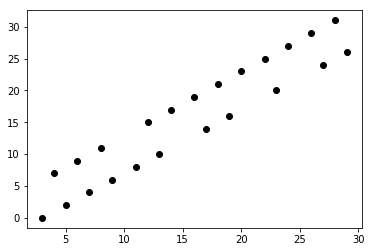

In [108]:
plt.plot(x_train,y_train,'ok')
plt.show()

In [109]:
poly = PolynomialFeatures(degree=8)
x_poly = poly.fit_transform(x_train.reshape(-1,1))

In [110]:
model = Ridge()
model.fit(x_poly, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [111]:
model.coef_

array([  0.000000000000000e+00,   4.854932410735316e-01,
         1.232493836265319e+00,  -3.562394018169769e-01,
         4.550774125986055e-02,  -3.070713817947232e-03,
         1.136143697458847e-04,  -2.175922248046562e-06,
         1.683100913199250e-08])

In [112]:
model.intercept_

-4.1550717889654258

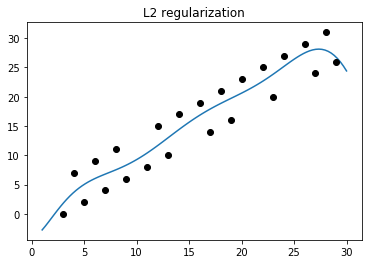

In [113]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('L2 regularization')
plt.show()

In [114]:
score = cross_val_score(model, x_poly, y_train, cv = 5)
score, score.mean()

(array([ 0.850169348503928,  0.603381498638496,  0.803408801015395,
         0.074362336612199,  0.207238419230548]), 0.50771208080011287)

# Elastic net regularization

In [115]:
model = ElasticNet()
model.fit(x_poly, y_train)

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [116]:
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         7.882466793459189e-02,  -1.564741256861161e-03,
        -1.030601595689769e-05,   2.002778162588361e-07,
         7.290912590361155e-09,   1.799276493292890e-11,
        -9.933694048516841e-12])

In [117]:
model.intercept_

2.9630013989997828

In [118]:
score = cross_val_score(model, x_poly, y_train, cv = 5)

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You migh

In [119]:
score, score.mean()

(array([ 0.881839079075679,  0.794029288364824,  0.896554665798357,
         0.160383794296646,  0.770213892248261]), 0.70060414395675341)

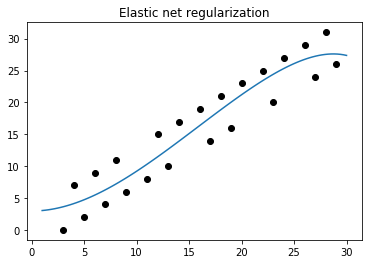

In [120]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('Elastic net regularization')
plt.show()

# Elastic Net CV
automatically search for alpha

In [121]:
model = ElasticNetCV(cv = 5, random_state=10, l1_ratio=np.arange(0.1,1.1,.1))


In [122]:
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(x_train.reshape(-1,1))

In [123]:
model.fit(x_poly,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
       max_iter=1000, n_alphas=100, n_jobs=1, normalize=False,
       positive=False, precompute='auto', random_state=10,
       selection='cyclic', tol=0.0001, verbose=0)

In [124]:
model.alpha_

1087043.2284801514

In [125]:
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         0.000000000000000e+00,   0.000000000000000e+00,
         0.000000000000000e+00,   4.939228040076360e-06,
        -1.367689601483063e-07])

In [126]:
score = cross_val_score(model, x_poly, y_train, cv = 5)
score, score.mean()

(array([ 0.822807313165186,  0.572291270897339,  0.583837597845999,
         0.517191062231145,  0.20869437465795 ]), 0.54096432375952364)

In [127]:
model.l1_ratio_

1.0

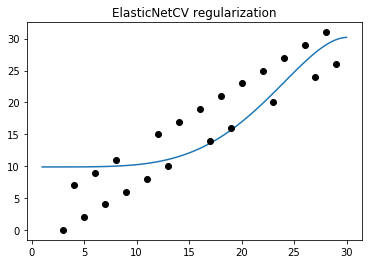

In [128]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('ElasticNetCV regularization')
plt.show()

Lasso is best when many variables are not relevant

# LassoCV

In [129]:

model = LassoCV(cv = 5, random_state=0)
model.fit(x_poly,y_train)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False)

In [130]:
model.alpha_

1087043.2284801514

In [131]:
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         0.000000000000000e+00,   0.000000000000000e+00,
         0.000000000000000e+00,   4.939228040076360e-06,
        -1.367689601483063e-07])

In [132]:
score = cross_val_score(model, x_poly, y_train, cv = 5)
score, score.mean()

(array([ 0.822807313165186,  0.572291270897339,  0.583837597845999,
         0.517191062231145,  0.208694187811905]), 0.54096428639031457)

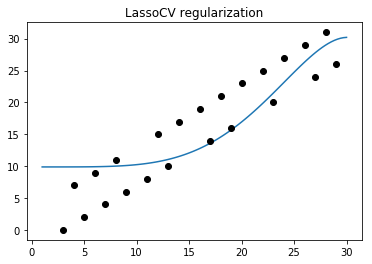

In [133]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('LassoCV regularization')
plt.show()

In [134]:
model = LassoCV(alphas=[1,10,100],cv = 5, random_state=0)
model.fit(x_poly,y_train)

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


LassoCV(alphas=[1, 10, 100], copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=0, selection='cyclic', tol=0.0001,
    verbose=False)

In [135]:
model.alpha_

1

In [136]:
model.coef_

array([  0.000000000000000e+00,   0.000000000000000e+00,
         7.689020066008979e-02,  -1.338684012417938e-03,
        -1.255646314468281e-05,   6.379653917227821e-08,
         5.963836733233610e-10])

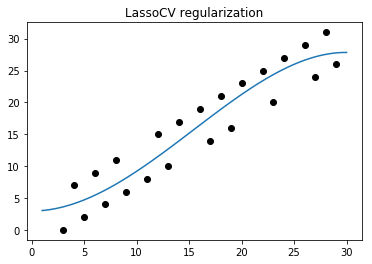

In [137]:
x_pred = np.linspace(1,30,100)
x_pred_poly = poly.fit_transform(x_pred.reshape(-1,1))
y_pred = model.predict(x_pred_poly)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('LassoCV regularization')
plt.show()

# Grid Search CV
http://austinrochford.com/posts/2013-12-12-polynomial-regression-cross-validation.html

## Step1: creating estimator for any degree

In [138]:
class PolyRegress(BaseEstimator):
    #inheriting from sklearn base class
    def __init__(self, deg=None):
        self.deg = deg
    def fit(self, X, y, deg=None):
        self.model = LinearRegression(fit_intercept=False)
        self.model.fit(np.vander(X, N=self.deg + 1
                                , increasing = True), y)    
    def predict(self, x):
        return self.model.predict(np.vander(x, N=self.deg + 1
                                , increasing = True))
    
    @property #treat method as property
    def coef_(self):
        return self.model.coef_

In [139]:
#Vandermonde matrix is the same as PolynomialFeatures.fit_transform()

In [140]:
np.vander(list(range(10)),N=3, increasing = True).astype('float64')

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.]])

In [141]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(np.array(list(range(10))).reshape(-1,1))

array([[  1.,   0.,   0.],
       [  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.]])

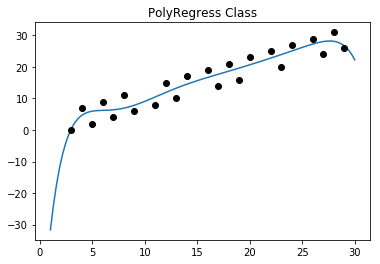

[ -7.260116941677111e+01   5.393692494650794e+01  -1.507254205055482e+01
   2.230472502672579e+00  -1.916923305954970e-01   9.967900215113788e-03
  -3.101577920961301e-04   5.328896571121788e-06  -3.896945344195046e-08]


In [142]:
model = PolyRegress(deg = 8)
model.fit(x_train,y_train)
x_pred = np.linspace(1,30,100)
y_pred = model.predict(x_pred)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('PolyRegress Class')
plt.show()
print(model.coef_)

## Step 2: Use Grid Search Cross Validation to find the right input ('deg')

In [143]:
cv_model = GridSearchCV(PolyRegress(), cv=5, param_grid={'deg':range(1,10)}, scoring = 'r2')

In [144]:
cv_model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise', estimator=PolyRegress(deg=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'deg': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='r2', verbose=0)

In [145]:
cv_model.best_estimator_

PolyRegress(deg=1)

In [146]:
cv_model.best_estimator_.coef_

array([-0.478448275862073,  1.038793103448276])

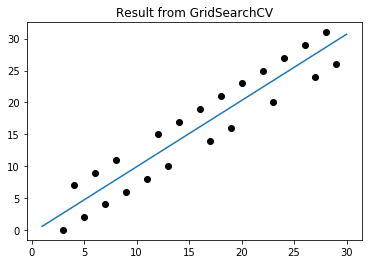

[-0.478448275862073  1.038793103448276]


In [147]:
model = cv_model.best_estimator_
x_pred = np.linspace(1,30,100)
y_pred = model.predict(x_pred)
plt.plot(x_pred,y_pred)
plt.plot(x_train,y_train,'ok')
plt.title('Result from GridSearchCV')
plt.show()
print(model.coef_)

In [148]:
cv_model.scorer_

make_scorer(r2_score)

In [149]:
cv_model.grid_scores_

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:747: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.80079, std: 0.12738, params: {'deg': 1},
 mean: 0.77815, std: 0.13002, params: {'deg': 2},
 mean: 0.72942, std: 0.23090, params: {'deg': 3},
 mean: 0.69769, std: 0.27195, params: {'deg': 4},
 mean: 0.59617, std: 0.30686, params: {'deg': 5},
 mean: 0.58236, std: 0.27568, params: {'deg': 6},
 mean: 0.53446, std: 0.33156, params: {'deg': 7},
 mean: 0.47438, std: 0.24430, params: {'deg': 8},
 mean: -0.33902, std: 1.88661, params: {'deg': 9}]

In [150]:
cv_model.cv_results_

{'mean_fit_time': array([ 0.000335836410522,  0.00027871131897 ,  0.000274562835693,
         0.000278186798096,  0.000276136398315,  0.000281047821045,
         0.000285005569458,  0.000290155410767,  0.000290679931641]),
 'mean_score_time': array([ 0.000210571289063,  0.000182771682739,  0.00020432472229 ,
         0.000182819366455,  0.000181770324707,  0.000181579589844,
         0.000182771682739,  0.000182580947876,  0.000183439254761]),
 'mean_test_score': array([ 0.80078710816164 ,  0.778150098689843,  0.7294232421672  ,
         0.697691276326501,  0.596169351351437,  0.58235522966779 ,
         0.534460608653628,  0.474382814275679, -0.339017799906967]),
 'mean_train_score': array([ 0.887351557073744,  0.891744986201837,  0.895003776914064,
         0.8984353060106  ,  0.902801122757825,  0.907118284867382,
         0.908561348123184,  0.917439285202303,  0.921275719486322]),
 'param_deg': masked_array(data = [1 2 3 4 5 6 7 8 9],
              mask = [False False False False 

In [151]:
df = pd.DataFrame(cv_model.cv_results_)
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_deg,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000336,0.000211,0.800787,0.887352,1,{'deg': 1},1,0.912977,0.876875,0.776334,...,0.902912,0.872580,0.560063,0.900100,0.804184,0.896968,0.000035,1.666026e-05,0.123343,0.010875
1,0.000279,0.000183,0.778150,0.891745,2,{'deg': 2},2,0.862928,0.891228,0.773130,...,0.904648,0.872617,0.529652,0.903545,0.768828,0.897567,0.000009,1.386932e-06,0.125702,0.010425
2,0.000275,0.000204,0.729423,0.895004,3,{'deg': 3},3,0.864932,0.892245,0.779231,...,0.894486,0.877857,0.261319,0.913385,0.759553,0.897616,0.000011,4.124214e-05,0.220727,0.011380
3,0.000278,0.000183,0.697691,0.898435,4,{'deg': 4},4,0.859194,0.896570,0.779694,...,0.837951,0.881160,0.138397,0.917688,0.777278,0.900994,0.000011,6.468134e-07,0.258674,0.011715
4,0.000276,0.000182,0.596169,0.902801,5,{'deg': 5},5,0.857159,0.896907,0.637614,...,0.720070,0.887911,-0.020926,0.921262,0.680347,0.903493,0.000004,6.503192e-07,0.293220,0.010958
5,0.000281,0.000182,0.582355,0.907118,6,{'deg': 6},6,0.870123,0.900483,0.596449,...,0.772780,0.888758,0.081781,0.923826,0.467572,0.904649,0.000004,4.672031e-07,0.267951,0.012507
6,0.000285,0.000183,0.534461,0.908561,7,{'deg': 7},7,0.872312,0.900772,0.571441,...,0.829413,0.889554,0.082087,0.923894,0.149605,0.906498,0.000002,8.341244e-07,0.324611,0.012995
7,0.000290,0.000183,0.474383,0.917439,8,{'deg': 8},8,0.468204,0.933781,0.441449,...,0.866213,0.889899,0.098829,0.924291,0.409040,0.906949,0.000002,1.070497e-06,0.242676,0.016749
8,0.000291,0.000183,-0.339018,0.921276,9,{'deg': 9},9,0.455848,0.935317,0.438952,...,0.848018,0.896466,0.091867,0.925392,-4.219741,0.916909,0.000006,1.293627e-06,1.796291,0.013929


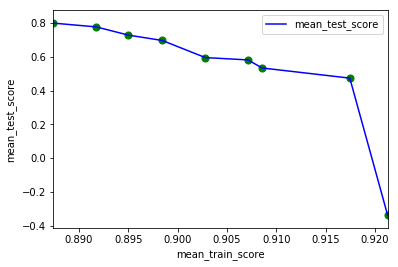

In [152]:
ax = df.plot.scatter('mean_train_score','mean_test_score', c = 'green', s = 50)
df.plot.line('mean_train_score','mean_test_score', c = 'blue', ax = ax)
plt.show()

### Step 3: try gridsearch with 3rd degree polynomial

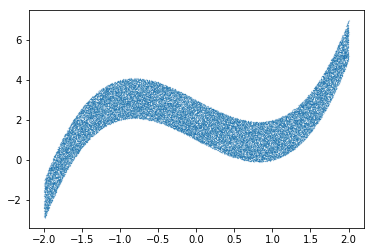

In [153]:
dat_fn = lambda x: x**3 - 2*x + 2
x_ = np.arange(-2,2,0.0001)
ran = np.random.uniform(low = -1, high = 1, size = x_.shape)
y_ = dat_fn(x_) + ran * 1
plt.plot(x_,y_, 'o', markersize = 0.1)
plt.show()

In [154]:
x_train, x_test, y_train, y_test = train_test_split(x_, y_)
cv_model = GridSearchCV(PolyRegress(), cv=5, param_grid={'deg':range(1,10)}, scoring = 'r2')
cv_model.fit(x_train,y_train)
df = pd.DataFrame(cv_model.cv_results_)
df[['param_deg','mean_test_score','mean_train_score']]

,param_deg,mean_test_score,mean_train_score
0,1,0.110423,0.110769
1,2,0.110354,0.110779
2,3,0.834754,0.834843
3,4,0.834748,0.834847
4,5,0.834718,0.834850
5,6,0.834705,0.834853
6,7,0.834717,0.834872
7,8,0.834734,0.834900
8,9,0.834730,0.834905


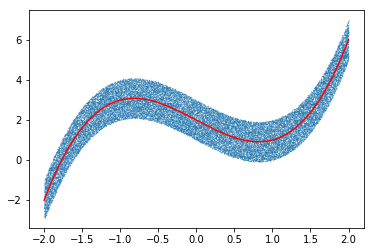

In [155]:
best_model = cv_model.best_estimator_
x_pred = np.arange(-2,2,0.0001)
y_pred = best_model.predict(x_pred)
plt.plot(x_,y_, 'o', markersize = 0.1)
plt.plot(x_pred,y_pred, '-r', markersize = 0.1)
plt.show()

# Stochastic Gradient Descent
### Basic Idea

1) Calculate the error with respect to the input unknown constants.
<br>2) Move into the direction that the error decrease most (gradient descent method)
<br>&nbsp;&nbsp;Note: The moving step size is adjusted through learning rate
<br>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; High learning rate = move fast
<br>&nbsp;&nbsp;&nbsp;&nbsp;The number of data used in each training can be just 1 - 5 rows
<br>&nbsp;&nbsp;&nbsp;&nbsp;Result is chaotic in nature (depending on the 1 - 5 rows use in each training)
<br><b> SGD is very sensitive to scale of the independet variable</b>
<br>To make each independent variable matters, scale it so that mean = 0, standard deviation = 1

### Try with simple example

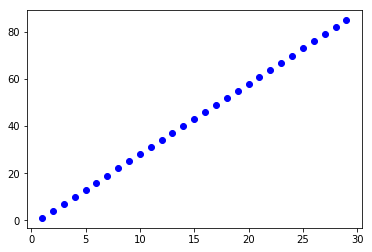

number of data =  29


In [156]:
X = np.arange(1,30, dtype = 'float64')
y = 3 * x - 2
plt.plot(X,y,'bo')
plt.show()
print('number of data = ', X.shape[0])

/home/me/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


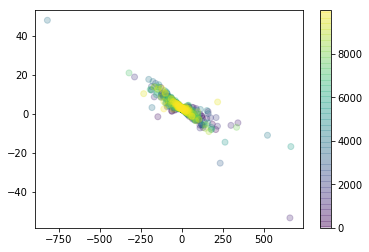

[-0.190284043120365] [ 2.90437790666217]


In [157]:
#use default setup of SGDRegressor
#Not a good idea
sgd = SGDRegressor()
ans = [[],[],[]]
for i in range(10000):
    sgd.fit(X.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])

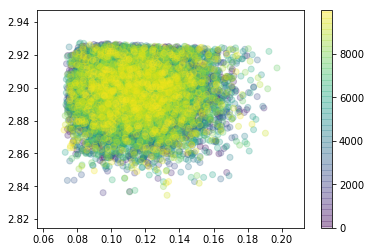

[ 0.136224734379049] [ 2.878694429196575]


In [158]:
sgd = SGDRegressor(max_iter = 2, penalty = None, fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
ans = [[],[],[]]
for i in range(10000):
    sgd.fit(X.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])

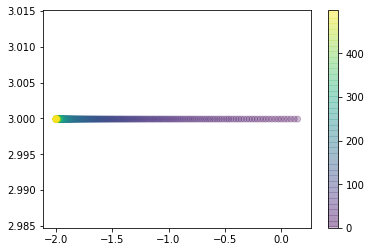

[-1.997936143067707] [ 2.999918975485236]


In [159]:
sgd = SGDRegressor(max_iter = 2, penalty = None, 
                   warm_start = True,  #take the old fitting into consideration
                   fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
ans = [[],[],[]]
for i in range(500):
    sgd.fit(X.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])

Notice that we do not get the intercept of -2 that we need

<font size = 5>
$x' = \frac{x - \bar{x}}{\sigma}$
</font>

### Take at most 300 samples randomly to do regression
### Close to take everything and do regression (not quite random)

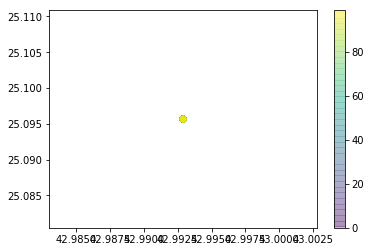

[ 42.992901598412942] [ 25.095665801239928]
slope =  [ 2.99950577359367]
intercept =  [-1.999685005492111]


In [160]:
sgd = SGDRegressor(max_iter = 300, penalty = None, shuffle=True,
                   fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(100):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

In [161]:
sgd.coef_

array([ 25.095665801239928])

In [162]:
scl.mean_

array([ 15.])

In [163]:
scl.scale_

array([ 8.366600265340756])

<font size = 5>
$y = a \frac{x - \bar{x}}{\sigma} + b$
<br> $y = \frac{a}{\sigma}x + (b - \frac{a\bar{x}}{\sigma})$
</font>

In [164]:
print('slope = ', ans[1][-1] / scl.scale_)

slope =  [ 2.99950577359367]


In [165]:
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

intercept =  [-1.999685005492111]


### Take at most 2 samples randomly to do regression in each iteration
### Note that constant learning rate make it passes the solution

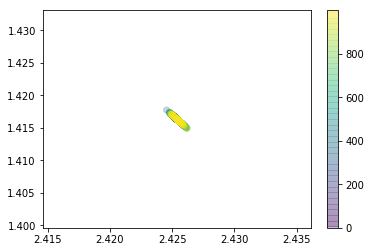

[ 2.425456930093449] [ 1.416219592302813]
slope =  [ 0.169270617382021]
intercept =  [-0.113602330636871]


In [166]:
sgd = SGDRegressor(max_iter = 2, penalty = None, shuffle=True,
                   fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(1000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

### Same method, just set warm_start = True (continue where it lefts)

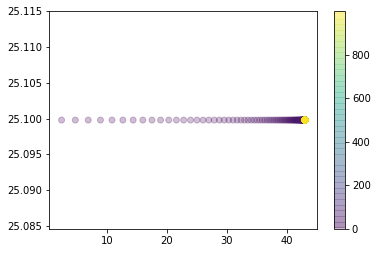

[ 42.99999999999774] [ 25.099800796022123]
slope =  [ 2.999999999999983]
intercept =  [-2.000000000002004]


In [167]:
sgd = SGDRegressor(max_iter = 2, penalty = None, shuffle=True,
                   warm_start = True,
                   fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(1000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

## Learning rate = 'optimal'
<font size = 5>
$eta = \frac{1.0}{(\alpha * (t + t_0))}$
</font>

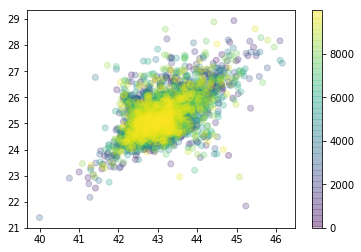

[ 42.20819983099129] [ 24.28191540245065]
slope =  [ 2.902243997844648]
intercept =  [-1.325460136678437]


In [168]:
sgd = SGDRegressor(max_iter = 5, penalty = None, shuffle=True,
                   fit_intercept=True, learning_rate='optimal', alpha = 1,
                  warm_start=False)
#for optimal learning we have   eta = 1.0 / (alpha * (t + t0))
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(10000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

### For warm_start = True, SGD take previous trainning into account too

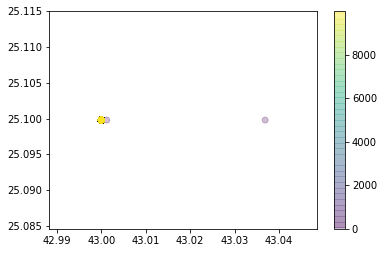

[ 43.] [ 25.099800796022265]
slope =  [ 3.]
intercept =  [-2.]


In [169]:
sgd = SGDRegressor(max_iter = 5, penalty = None, shuffle=True,
                   fit_intercept=True, learning_rate='optimal', alpha = 1,
                  warm_start=True)
#for optimal learning we have   eta = 1.0 / (alpha * (t + t0))
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(10000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

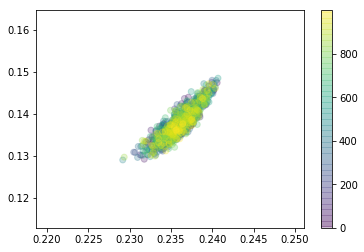

[ 0.235741095468802] [ 0.135698785508263]
slope =  [ 0.016219107069141]
intercept =  [-0.007545510568308]


In [170]:
sgd = SGDRegressor(max_iter = 5, penalty = None, shuffle=True,
                   fit_intercept=True, learning_rate='invscaling', eta0 = 1e-4)
#for optimal learning we have   eta = 1.0 / (alpha * (t + t0))
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(1000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

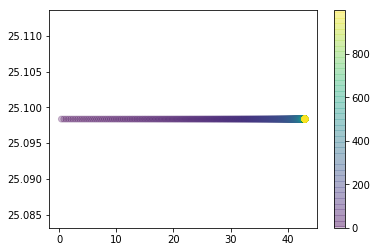

[ 42.997530677839137] [ 25.098359213682958]
slope =  [ 2.999827697954535]
intercept =  [-1.999884791478884]


In [171]:
sgd = SGDRegressor(max_iter = 5, penalty = None, shuffle=True, 
                   warm_start = True,
                   fit_intercept=True, learning_rate='invscaling', 
                   eta0 = 1e-4, power_t = 0.1)
#for optimal learning we have   eta = 1.0 / (alpha * (t + t0))
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
for i in range(1000):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

# Stop training when mean-squre-error is lowest

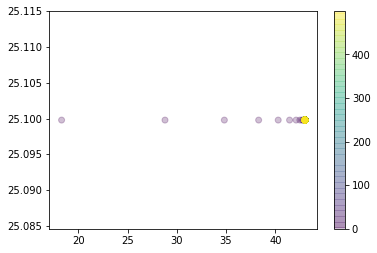

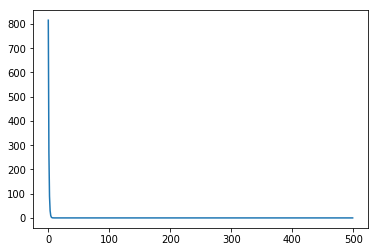

[ 42.999999999999659] [ 25.099800796022262]
slope =  [ 3.]
intercept =  [-2.000000000000334]


In [172]:
sgd = SGDRegressor(max_iter = 5, penalty = None, shuffle=True,
                   warm_start = True,
                   fit_intercept=True, learning_rate='invscaling', alpha = 1)
#for optimal learning we have   eta = 1.0 / (alpha * (t + t0))
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
ans = [[],[],[]]
mse = []
iteration = 500
for i in range(iteration):
    sgd.fit(x_scl.reshape(-1,1),y)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
    y_pred = sgd.predict(x_scl)
    mse.append(mean_squared_error(y,y_pred))
plt.scatter(ans[0],ans[1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()

plt.figure()
plt.plot(list(range(iteration)),mse)
plt.show()

print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)

### Comparison between the case with scaling and without scaling

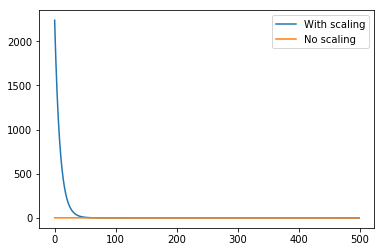

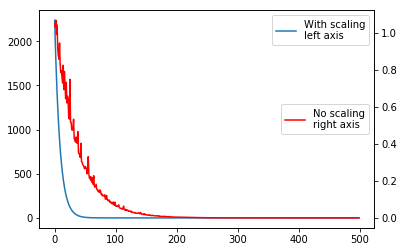

[ 42.999999999999659] [ 25.099800796022262]
slope =  [ 3.]
intercept =  [-2.000000000000334]


In [173]:
## without scaling
sgd = SGDRegressor(max_iter = 2, penalty = None, 
                   warm_start = True,  #take the old fitting into consideration
                   fit_intercept=True, learning_rate='constant', eta0 = 1e-3)
mse_no_scl = []
for i in range(500):
    sgd.fit(X.reshape(-1,1),y)
    y_pred = sgd.predict(X.reshape(-1,1))
    mse_no_scl.append(mean_squared_error(y,y_pred))

## with scaling
scl = StandardScaler()
x_scl = scl.fit_transform(X.reshape(-1,1))
mse = []
iteration = 500
for i in range(iteration):
    sgd.fit(x_scl.reshape(-1,1),y)
    y_pred = sgd.predict(x_scl)
    mse.append(mean_squared_error(y,y_pred))

plt.figure()
plt.plot(list(range(iteration)),mse, label = 'With scaling')
plt.plot(list(range(iteration)),mse_no_scl, label = 'No scaling')
plt.legend()
plt.show()

plt.figure()
plt.plot(list(range(iteration)),mse, label = 'With scaling\nleft axis')
plt.legend()
ax2 = plt.twinx()
ax2.plot(list(range(iteration)),mse_no_scl, 'r-', label = 'No scaling\nright axis')
ax2.legend(loc=7)
plt.show()



print(ans[0][-1],ans[1][-1])
print('slope = ', ans[1][-1] / scl.scale_)
print('intercept = ', ans[0][-1] - ans[1][-1] * scl.mean_ / scl.scale_)


# SGDRegressor for noisy data

### Step 0: Start with small clean data
* Learn how to use Pipeline
* Learn how to access the step in Pipeline
* Learn how to use other basis other than polynomial
* Learn that polynomial is not the universal fit for all

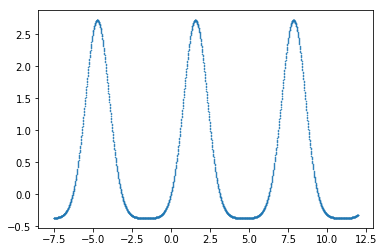

In [174]:
np.random.seed(100)
def dat2_fn(x):
    return np.sin(x)*np.exp(np.sin(x))
x_ = np.arange(-7.5,12,0.01)
y_ = dat2_fn(x_)
plt.plot(x_,y_, 'o', markersize = 0.5)
plt.show()

In [175]:
#creating first order of vector x, consisting of 
# x, sin(x), and cos(x)
x_col = x_.reshape(-1,1)
x_first = np.c_[x_col,
                np.sin(x_col),np.cos(x_col)]

In [176]:
x_first

array([[ -7.5              ,  -0.937999976774739,   0.346635317835026],
       [ -7.49             ,  -0.934486781760646,   0.355997829648764],
       [ -7.48             ,  -0.930880138847114,   0.365324741976202],
       ..., 
       [ 11.969999999999587,  -0.561643299886507,   0.827379479859511],
       [ 11.979999999999585,  -0.553341561052827,   0.832954450622374],
       [ 11.989999999999583,  -0.544984488524158,   0.838446126634301]])

In [177]:
#creating our own data preprocessing class
#method fit and method transform are needed when doing Pipeline
#y = None is needed when we do Pipeline_name(X,y)
#if there is no y = None, error occur when run Pipeline
class sin_cos_bases(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,X, y = None):
        return self
    def transform(self,X, y = None): #add sin / cos column to x
        return np.c_[X, np.sin(X), np.cos(X)]
    def fit_transform(self,X, y = None):
        #x need to be column vector
        self.fit(X)
        self.ans = self.transform(X, y = None)
        return self.ans
class check_input(BaseEstimator):
    def __init__(self):
        pass
    def fit(self,X, y = None):
        return self
    def transform(self,X, y = None): #add sin / cos column to x
        return X
    def fit_transform(self,X, y = None):
        self.X = X
        return self.transform(X, y = None)
    

In [178]:
sin_cos = sin_cos_bases()
test = sin_cos.fit_transform(np.array([1,2,3,4,5]).reshape(-1,1))
test

array([[ 1.               ,  0.841470984807897,  0.54030230586814 ],
       [ 2.               ,  0.909297426825682, -0.416146836547142],
       [ 3.               ,  0.141120008059867, -0.989992496600445],
       [ 4.               , -0.756802495307928, -0.653643620863612],
       [ 5.               , -0.958924274663138,  0.283662185463226]])

In [179]:

sin_cos = sin_cos_bases()
poly = PolynomialFeatures(degree=2)
std_scale = StandardScaler()
lin_reg = LinearRegression(fit_intercept=True)
check_input = check_input()
my_reg = Pipeline([
                ('sin_cos', sin_cos),
                ('poly_feature', poly),
                ('std_scale', std_scale),
                ('chk_input', check_input),
#check input is just to show the variable passing to lin_reg
                ('linear_reg', lin_reg)
            ])

In [180]:
my_reg.fit(x_.reshape(-1,1), y_)

Pipeline(memory=None,
     steps=[('sin_cos', sin_cos_bases()), ('poly_feature', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('std_scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('chk_input', check_input()), ('linear_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

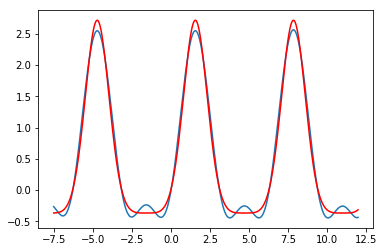

r2 =  0.991676766901


In [181]:
y_pred = my_reg.predict(x_.reshape(-1,1))
plt.plot(x_,y_pred)
plt.plot(x_,y_, 'r')
plt.show()
r2 = r2_score(y_,y_pred)
print('r2 = ', r2)

In [182]:
np.set_printoptions(precision=16,suppress=False)
my_reg.named_steps['linear_reg'].coef_

array([  0.0000000000000000e+00,  -7.0267668363236391e-03,
         9.8993180625233623e-01,   4.2850972109098606e-05,
         6.5353097648864870e-03,   8.5075787404321757e-03,
         2.2091235482625191e-04,  -1.0792432255752600e+12,
        -1.6139149651073909e-04,  -1.0792432255756720e+12])

In [183]:
my_reg.named_steps['linear_reg'].intercept_

0.53496900936406122

In [184]:
my_reg.named_steps['sin_cos'].ans

array([[ -7.5               ,  -0.9379999767747389,   0.3466353178350258],
       [ -7.4900000000000002,  -0.934486781760646 ,   0.3559978296487644],
       [ -7.4800000000000004,  -0.9308801388471136,   0.3653247419762019],
       ..., 
       [ 11.9699999999995867,  -0.5616432998865066,   0.8273794798595113],
       [ 11.9799999999995848,  -0.5533415610528266,   0.8329544506223741],
       [ 11.9899999999995828,  -0.5449844885241577,   0.838446126634301 ]])

In [185]:
np.set_printoptions(precision=5)
my_reg.named_steps['chk_input'].X

array([[ 0.     , -1.73116, -1.28677, ...,  1.07681, -0.86797, -1.07681],
       [ 0.     , -1.72939, -1.28181, ...,  1.05799, -0.88906, -1.05799],
       [ 0.     , -1.72761, -1.27673, ...,  1.03874, -0.90977, -1.03874],
       ..., 
       [ 0.     ,  1.72761, -0.75599, ..., -0.53775, -1.25869,  0.53775],
       [ 0.     ,  1.72939, -0.74428, ..., -0.56423, -1.2481 ,  0.56423],
       [ 0.     ,  1.73116, -0.73249, ..., -0.59049, -1.23699,  0.59049]])

In [186]:
np.set_printoptions(precision=1,suppress=True)
x_scaled = my_reg.named_steps['chk_input'].X[::40,:]
x_scaled
#note that polynomail feature create [1, a, b, a^2, ab, b^2]

array([[ 0. , -1.7, -1.3,  0.5,  0.5,  1.7, -0.5,  1.1, -0.9, -1.1],
       [ 0. , -1.7, -1. ,  0.9,  0.4,  1.3, -1. ,  0.1, -1.4, -0.1],
       [ 0. , -1.6, -0.5,  1.3,  0.2,  0.8, -1.3, -1. , -1. ,  1. ],
       [ 0. , -1.5,  0. ,  1.4,  0.1,  0.2, -1.4, -1.4, -0. ,  1.4],
       [ 0. , -1.4,  0.6,  1.3, -0.1, -0.4, -1.2, -1. ,  1. ,  1. ],
       [ 0. , -1.4,  1. ,  1. , -0.2, -0.7, -0.8, -0. ,  1.4,  0. ],
       [ 0. , -1.3,  1.3,  0.5, -0.3, -0.9, -0.3,  1. ,  1. , -1. ],
       [ 0. , -1.2,  1.4, -0. , -0.4, -0.9,  0.2,  1.4,  0. , -1.4],
       [ 0. , -1.2,  1.3, -0.6, -0.5, -0.8,  0.6,  1. , -1. , -1. ],
       [ 0. , -1.1,  1. , -1.1, -0.6, -0.5,  0.9, -0.1, -1.4,  0.1],
       [ 0. , -1. ,  0.5, -1.4, -0.6, -0.1,  1. , -1.1, -0.9,  1.1],
       [ 0. , -0.9, -0. , -1.4, -0.7,  0.2,  0.9, -1.4,  0.2,  1.4],
       [ 0. , -0.9, -0.6, -1.3, -0.8,  0.4,  0.8, -0.9,  1.1,  0.9],
       [ 0. , -0.8, -1. , -1. , -0.8,  0.5,  0.5,  0.2,  1.4, -0.2],
       [ 0. , -0.7, -1.3, -0.5, -0

In [187]:
np.set_printoptions(precision=16)

In [188]:
inv_trans = my_reg.named_steps['std_scale'].inverse_transform(x_scaled)
inv_trans

array([[   1.                ,   -7.5               ,
          -0.9379999767747389,    0.3466353178350258,
          56.25              ,    7.0349998258105408,
          -2.5997648837626937,    0.8798439564294107,
          -0.3251439200785585,    0.1201560435705894],
       [   1.                ,   -7.1000000000000085,
          -0.7289690401258819,    0.6845466664428002,
          50.4100000000001245,    5.1756801848937677,
          -4.8602813317438871,    0.5313958614620499,
          -0.4990133263581804,    0.4686041385379503],
       [   1.                ,   -6.7000000000000171,
          -0.4048499206166137,    0.9143831482353126,
          44.8900000000002279,    2.712494468131319 ,
          -6.1263670931766097,    0.1639034582232785,
          -0.3701879449762356,    0.8360965417767215],
       [   1.                ,   -6.3000000000000256,
          -0.0168139004843755,    0.9998586363834148,
          39.6900000000003246,    0.1059275730515659,
          -6.299109409215

In [189]:
inv_trans[:,1]
#get the original x from inverse transform

array([ -7.5               ,  -7.1000000000000085,  -6.7000000000000171,
        -6.3000000000000256,  -5.9000000000000341,  -5.5000000000000417,
        -5.1000000000000512,  -4.7000000000000597,  -4.3000000000000691,
        -3.9000000000000767,  -3.5000000000000853,  -3.1000000000000938,
        -2.7000000000001023,  -2.3000000000001108,  -1.9000000000001194,
        -1.5000000000001275,  -1.1000000000001364,  -0.700000000000145 ,
        -0.3000000000001535,   0.099999999999838 ,   0.4999999999998292,
         0.8999999999998209,   1.2999999999998124,   1.6999999999998039,
         2.0999999999997954,   2.4999999999997868,   2.8999999999997783,
         3.2999999999997698,   3.6999999999997613,   4.0999999999997527,
         4.4999999999997442,   4.8999999999997357,   5.2999999999997272,
         5.6999999999997186,   6.0999999999997101,   6.4999999999997016,
         6.899999999999693 ,   7.2999999999996845,   7.699999999999676 ,
         8.0999999999996675,   8.4999999999996589, 

### Try to use polynomail to fit the distorted sine curve

In [190]:
cv_model = GridSearchCV(PolyRegress(), cv=5, param_grid={'deg':range(1,60)}, scoring = 'r2')
cv_model.fit(x_,y_)
df = pd.DataFrame(cv_model.cv_results_)
df['deg'] = (df['param_deg']).astype(int)
df[['param_deg','mean_test_score','mean_train_score','deg']]

,param_deg,mean_test_score,mean_train_score,deg
0,1,-4.351264e+00,0.020604,1
1,2,-6.993318e+00,0.069327,2
2,3,-1.723628e+01,0.113643,3
3,4,-3.443629e+01,0.257166,4
4,5,-4.778601e+02,0.388488,5
5,6,-1.258153e+03,0.484029,6
6,7,-5.615371e+03,0.603962,7
7,8,-1.450230e+04,0.742894,8
8,9,-1.543129e+04,0.842352,9
9,10,-7.802187e+04,0.883145,10


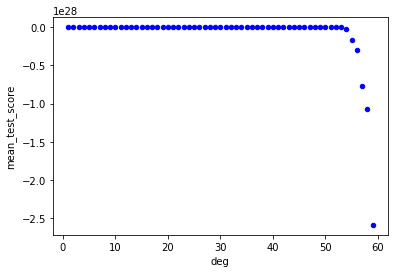

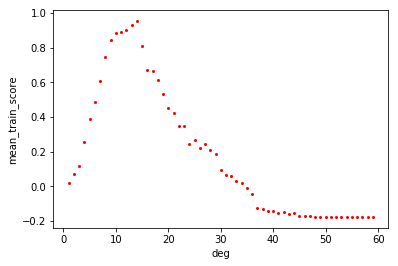

In [191]:
df.plot.scatter('deg','mean_test_score', c = 'blue')
df.plot.scatter('deg','mean_train_score', c = 'red', s = 4)
plt.show()

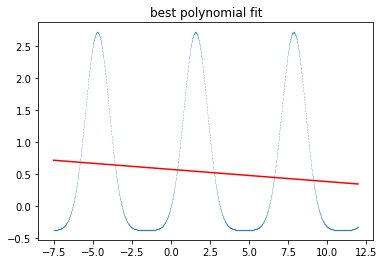

1


In [192]:
best_model = cv_model.best_estimator_
y_pred = best_model.predict(x_)
plt.plot(x_,y_, 'o', markersize = 0.1)
plt.plot(x_,y_pred, '-r', markersize = 0.1)
plt.title('best polynomial fit')
plt.show()
print(best_model.deg)

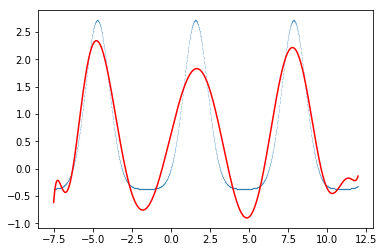

14


In [193]:
model = PolyRegress(deg=14)
model.fit(x_,y_)
y_pred = model.predict(x_)
plt.plot(x_,y_, 'o', markersize = 0.1)
plt.plot(x_,y_pred, '-r', markersize = 0.1)
plt.show()
print(model.deg)

Best polynomial cannot fit the sine curve

### Step 1: use SGDRegressor to fit the clean data
do gridsearch on the case without iteration 
<br> to see which option work then do the full iteration

In [194]:
preprocess_pipe =  Pipeline([
                ('sin_cos', sin_cos),
                ('poly_feature', poly),
                ('std_scale', std_scale),
            ])
x_scl = preprocess_pipe.fit_transform(x_)
reg = SGDRegressor(warm_start=True, max_iter=3)
para_eta0 = [10**(-i) for i in range(1,10)]
para_learning_rate = ['constant','optimal','invscaling']
param_grid = {'eta0':para_eta0, 'learning_rate':para_learning_rate}
cv_model = GridSearchCV(reg, param_grid=param_grid, scoring='r2', cv = 5)
cv_model.fit(x_scl,y_)
df = pd.DataFrame(cv_model.cv_results_)
df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_eta0,param_learning_rate,params,rank_test_score,split0_test_score,split0_train_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000742,0.000287,9.695321e-01,9.845332e-01,0.1,constant,"{'eta0': 0.1, 'learning_rate': 'constant'}",1,9.726871e-01,9.847668e-01,...,9.849655e-01,9.862650e-01,9.928797e-01,9.844768e-01,9.816798e-01,9.843590e-01,1.364077e-04,2.954098e-05,2.780596e-02,1.104248e-03
1,0.000794,0.000277,-3.241701e+26,-7.243842e+25,0.1,optimal,"{'eta0': 0.1, 'learning_rate': 'optimal'}",23,-1.762823e+25,-4.502897e+25,...,-4.072967e+25,-1.049426e+26,-2.161448e+25,-5.730227e+25,-2.547064e+26,-9.364021e+25,1.506731e-04,4.115743e-06,4.891050e+26,2.285157e+25
2,0.001096,0.000294,9.648714e-01,9.912415e-01,0.1,invscaling,"{'eta0': 0.1, 'learning_rate': 'invscaling'}",2,9.903399e-01,9.904029e-01,...,9.889057e-01,9.912671e-01,9.918795e-01,9.911697e-01,9.816970e-01,9.915265e-01,6.152863e-06,1.880613e-05,4.679857e-02,4.796453e-04
3,0.000701,0.000307,9.639095e-01,9.913516e-01,0.01,constant,"{'eta0': 0.01, 'learning_rate': 'constant'}",3,9.867893e-01,9.906694e-01,...,9.888043e-01,9.913028e-01,9.912768e-01,9.913456e-01,9.833081e-01,9.916643e-01,4.494933e-06,3.054737e-06,4.734222e-02,3.861721e-04
4,0.000743,0.000303,-5.872946e+26,-7.918272e+25,0.01,optimal,"{'eta0': 0.01, 'learning_rate': 'optimal'}",27,-8.873035e+25,-3.807242e+25,...,-1.327530e+26,-1.996636e+26,-3.710493e+25,-1.724307e+25,-5.175538e+25,-3.058587e+25,1.252549e-06,2.728409e-06,1.019954e+27,6.837425e+25
5,0.001089,0.000355,9.091943e-01,9.900752e-01,0.01,invscaling,"{'eta0': 0.01, 'learning_rate': 'invscaling'}",4,8.668381e-01,9.855415e-01,...,9.867683e-01,9.909517e-01,9.879286e-01,9.913272e-01,9.302201e-01,9.908456e-01,2.180799e-05,1.167112e-04,8.083555e-02,2.287181e-03
6,0.000790,0.000338,8.016592e-01,9.866591e-01,0.001,constant,"{'eta0': 0.001, 'learning_rate': 'constant'}",5,7.476629e-01,9.757599e-01,...,9.808762e-01,9.889745e-01,9.753488e-01,9.900312e-01,8.365697e-01,9.886890e-01,1.324560e-04,5.629438e-05,1.886040e-01,5.473004e-03
7,0.000527,0.000236,-2.721370e+26,-1.398173e+26,0.001,optimal,"{'eta0': 0.001, 'learning_rate': 'optimal'}",21,-1.031474e+26,-1.949117e+26,...,-2.626498e+26,-2.439922e+26,-2.987452e+25,-8.154218e+25,-1.761229e+26,-7.156724e+25,2.452890e-05,9.191268e-05,2.696632e+26,6.784400e+25
8,0.000776,0.000205,1.083186e-02,7.684247e-01,0.001,invscaling,"{'eta0': 0.001, 'learning_rate': 'invscaling'}",6,1.064006e-02,7.899315e-01,...,5.068328e-01,7.146557e-01,5.946506e-01,7.382842e-01,6.142483e-01,7.863954e-01,9.498783e-05,3.083245e-05,8.698978e-01,3.621949e-02
9,0.000656,0.000264,-1.191821e-01,5.886266e-01,0.0001,constant,"{'eta0': 0.0001, 'learning_rate': 'constant'}",7,-1.898793e-01,6.325071e-01,...,1.920476e-01,5.291272e-01,4.149961e-01,5.545769e-01,5.260450e-01,5.957217e-01,2.726741e-06,1.390207e-06,7.509659e-01,4.120168e-02


In [195]:
cv_model.best_estimator_

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=3, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

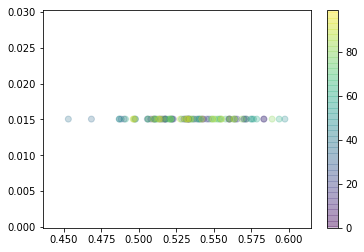

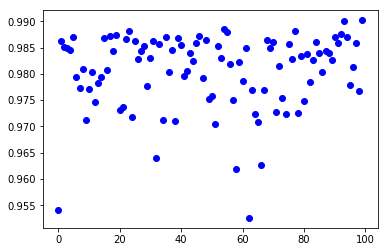

In [196]:
sgd = cv_model.best_estimator_
ans = [[],[],[]]
r2 = []
for i in range(100):
    sgd.fit(x_scl,y_)
    ans[0].append(sgd.intercept_)
    ans[1].append(sgd.coef_)
    ans[2].append(i)
    y_pred = sgd.predict(x_scl)
    r2.append(r2_score(y_,y_pred))
plt.scatter(np.array(ans[0]),np.array(ans[1])[:,1],c=ans[2], alpha = 0.25)
plt.colorbar()
plt.show()
plt.figure()
plt.plot(ans[2],r2,'bo')
plt.show()

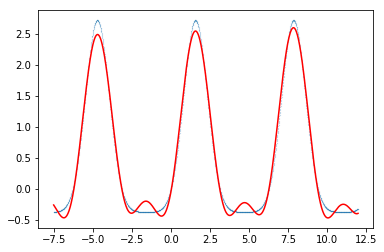

r2 =  0.990190586982


In [197]:
y_pred = sgd.predict(x_scl)
r2 = r2_score(y_,y_pred)
plt.plot(x_,y_, 'o', markersize = 0.1)
plt.plot(x_,y_pred, '-r', markersize = 0.1)
plt.show()
print('r2 = ', r2)

### Step 2: use SGDRegressor to fit noisy data

In [198]:
y_.shape

(1950,)

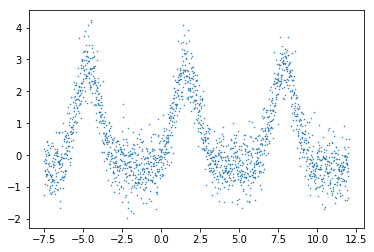

In [199]:
np.random.seed(100)
noise = np.random.normal(size = y_.shape)
y_real = y_ + 0.5 * noise
plt.plot(x_,y_real, 'o', markersize = 0.5)
plt.show()

In [200]:
sgd = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=3, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)

0.803062558788
0.792924893021
0.811367790703
0.801717362586
0.809679035085
0.809450559865
0.803806703944
0.812373227827
0.802494440668
0.805320210558
0.803738947216
0.809222601533
0.808337934119
0.80595400855
0.803662947108
0.798019914045
0.802080726791
0.807230470258
0.808964164392
0.807679320907


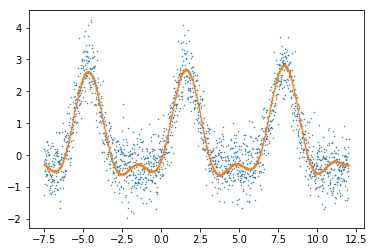

0.807679320907


In [201]:
x_scl = preprocess_pipe.fit_transform(x_)
for i in range(20):
    sgd.fit(x_scl,y_real)
    y_pred = sgd.predict(x_scl)
    r2 = r2_score(y_real,y_pred)
    print(r2)
y_pred = sgd.predict(x_scl)
plt.plot(x_,y_real, 'o', markersize = 0.5)
plt.plot(x_,y_pred, 'o', markersize = 0.5)
plt.show()
r2 = r2_score(y_real,y_pred)
print(r2)

### Step 3: Incremental learning
Large data are separated over several files
<br> 3.1: create the data files. Each file contain each part of the data
<br> 3.2: use sgd to fit data piece-by-piece

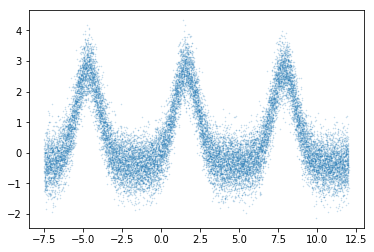

total number of row =  19500


In [202]:
np.random.seed(100)
it_file = np.linspace(-7.5, 12, 10)
x_ = np.arange(-7.5,12,0.001)
y_ = dat2_fn(x_)
noise = np.random.normal(size = y_.shape)
y_real = y_ + 0.5 * noise
plt.plot(x_,y_real, 'o', markersize = 0.5, alpha = 0.25)
plt.show()
print('total number of row = ', x_.shape[0])
data = np.c_[x_,y_real]
np.savetxt('incremental_data.csv',data,delimiter=',')

In [203]:
y_real.shape

(19500,)

In [204]:
#This creates 9 files, 1.1 MB each, 21k lines each.
#Totally, 9.9 MB
#If larger file is needed for testing purposes,
#decrease the increment from 0.0001 to 1e-6
#care should be taken, because file size will increase
#as well as the training time
for i in range(len(it_file)-1):
    x_ = np.arange(it_file[i],it_file[i+1],0.0001)
    y_ = dat2_fn(x_)
    noise = np.random.normal(size = y_.shape)
    y_real = y_ + 0.5 * noise
    data = np.c_[x_,y_real]
    np.savetxt('bigdata_' + str(i) + '.csv', data,delimiter=',')

### plotting graph from file 'bigdata_4.csv'

In [205]:
data = np.loadtxt('bigdata_4.csv', dtype = 'float64', delimiter = ',')

In [206]:
data

array([[ 1.1666666666666661,  2.9466379863199101],
       [ 1.1667666666666661,  1.6548681453511593],
       [ 1.1668666666666661,  2.4713666211801684],
       ..., 
       [ 3.3330666666664275,  0.0389043722326529],
       [ 3.3331666666664272, -1.1056358802382333],
       [ 3.3332666666664275, -0.4079556545758299]])

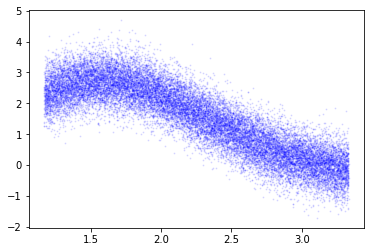

In [207]:
plt.plot(data[:,0],data[:,1],'bo', markersize = 1,alpha = 0.1)
plt.show()

### Plotting graph from each file (9 graphs)

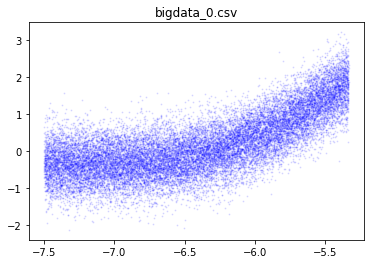

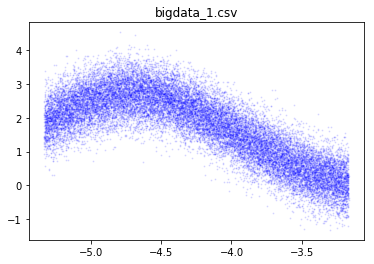

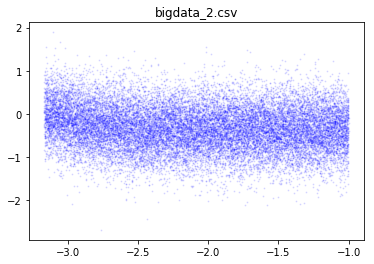

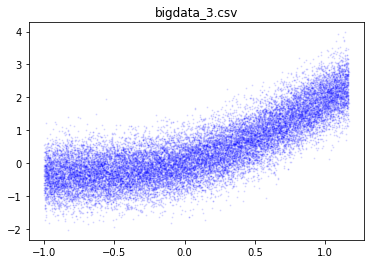

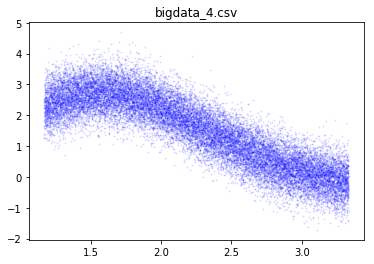

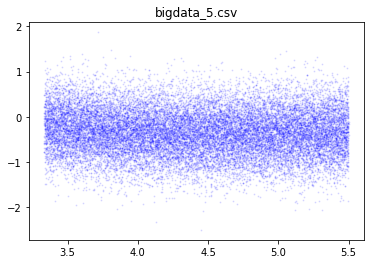

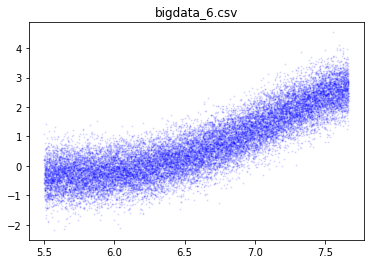

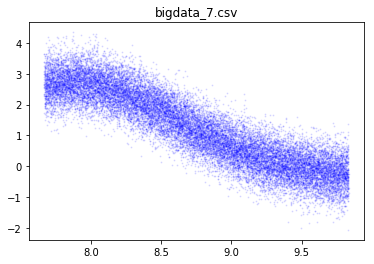

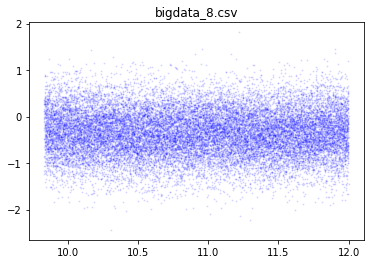

In [208]:
for i in range(9):
    data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
    plt.figure()
    plt.plot(data[:,0],data[:,1],'bo', markersize = 1,alpha = 0.1)

    plt.title('bigdata_' + str(i) + '.csv')
    plt.show()

In [209]:
#making the test dataset for r2 calculation
data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
x_ = data[:,0]
x_scl = preprocess_pipe.fit_transform(x_)

x_test = np.arange(-7.5,12,0.01)
x_scl_test = preprocess_pipe.transform(x_test)
y_test = dat2_fn(x_test)
noise = np.random.normal(size = y_test.shape)
y_real = y_test + 0.5 * noise

#start to open each file and run sgd.partial_fit
def r2_for_train_n_times(n):
    sgd = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=3, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=True)
    #fit the preprocessing model only once, then later just use transform
    #otherwise, each minibatch has its own x_bar and SD and do different
    #preprocessing procedure
    i = 0
    data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
    x_ = data[:,0]
    y_ = data[:,1]
    x_scl = preprocess_pipe.transform(x_)
    for it_train in range(n):
        sgd.partial_fit(x_scl,y_)

    for i in range(1, 9):
        data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
        x_ = data[:,0]
        y_ = data[:,1]
        x_scl = preprocess_pipe.transform(x_)
        for it_train in range(n):
            sgd.partial_fit(x_scl,y_)
    y_pred = sgd.predict(x_scl_test)
    r2 = r2_score(y_real,y_pred)
    return r2

r2_list = []
n_list = list(range(1,200,10))
for n in n_list:
    r2_list.append(r2_for_train_n_times(n))


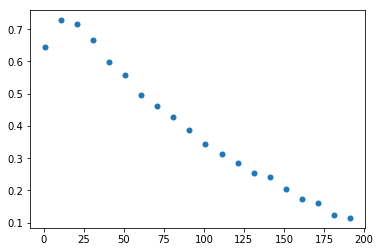

In [210]:
plt.plot(n_list,r2_list,'o', markersize=5)
plt.show()

For stochastic approach, train more does not mean that more accuracy can be achieved.
<br>We should stop training when the performance decrease or the model fit to the noise.
<br>This is called early stop. When doing the early stop approach, separate the test set out first
<br>Then use the validation set (come from the train set) to calculate the score
<br>on the validation set.  If the error increase on the validation set, 
<br>then the stochastic gradient descent start to overfit the data
<br>this is equivalent to trust the data too much or fit to the noise
<br><br>Very often, the learning rate decrease as training progress, this make the model
<br>to give a less weight on the patterns that come late. Then, the number of training
<br>may need to be adjusted to be lower, otherwise, the model may just fit with
<br>the early pattern, but does not consider the other patterns that come late much
<br><br>In the case above, the test set was artifically created later
<br>For real case, separate the test set out first.
<br>For the above example, the number of iteration to train SGD should be 21 times
## Note that SGD see one pattern at a time, but can still fit the data!

In [211]:
max(zip(n_list, r2_list), key = lambda x: x[1])

(11, 0.72777002002226743)

In [212]:
n = 11
sgd2 = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.001,
   fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
   loss='squared_loss', max_iter=3, n_iter=None, penalty='l2',
   power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
   warm_start=True)
#fit the preprocessing model only once, then later just use transform
#otherwise, each minibatch has its own x_bar and SD
i = 0
data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
x_ = data[:,0]
y_ = data[:,1]
x_scl = preprocess_pipe.transform(x_)
for it_train in range(n):
    sgd2.partial_fit(x_scl,y_)

for i in range(1, 9):
    data = np.loadtxt('bigdata_' + str(i) + '.csv', dtype = 'float64', delimiter = ',')
    x_ = data[:,0]
    y_ = data[:,1]
    x_scl = preprocess_pipe.transform(x_)
    for it_train in range(n):
        sgd2.partial_fit(x_scl,y_)
y_pred = sgd2.predict(x_scl_test)
r2 = r2_score(y_real,y_pred)

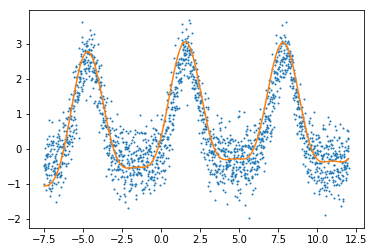

r2 score =  0.73959262555


In [213]:
x_test = np.arange(-7.5,12,0.01)
x_scl = preprocess_pipe.transform(x_test)
y_test = dat2_fn(x_test)
noise = np.random.normal(size = y_test.shape)
y_real = y_test + 0.5 * noise
y_pred = sgd2.predict(x_scl)
plt.plot(x_test,y_real,'o',markersize = 1)
plt.plot(x_test,y_pred)
plt.show()
print('r2 score = ',r2_score(y_real,y_pred))

The r2_score value may not be identical from run to run
<br> because SGD randomly select the data for training

## Additional note
To make the program to be more robust when encounter the large file,
<br>if possible, small subset of the file can be sampled first before
<br>sending the data to partail_fit() method. The sampled process
<br>should be random in nature. The